# Exploration of orderlines.csv

In [1]:
import pandas as pd

In [2]:
url = "https://drive.google.com/file/d/1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG/view?usp=sharing" # orderlines.csv
#url = "https://drive.google.com/file/d/1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ/view?usp=sharing" # orders.csv
#url = "https://drive.google.com/file/d/1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU/view?usp=sharing" # products.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_original = pd.read_csv(path)

#MAKE A COPY
orderlines = orderlines_original.copy()

## Check size, data-types and missing values with  .shape and .info()

In [3]:
orderlines.shape 

(293983, 7)

In [4]:
orderlines.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


In [7]:
orderlines.isna().sum()
# check if everything is alphanumeric
#order.order_id.str.isalnum() --> only works on object-type

id                  0
id_order            0
product_id          0
product_quantity    0
sku                 0
unit_price          0
date                0
dtype: int64

In [34]:
orderlines.nunique()

id                  293983
id_order            204855
product_id               1
product_quantity        67
sku                   7951
unit_price           11329
date                251631
dtype: int64

In [35]:
orderlines.duplicated().sum()

0

**INFO:**
- 293983 rows, 7 columns
- The ids are unique
- no missing values
- The ids are all integers (id, id_order, product_id)

**TO BE CHECKED:**
- 204855 unique values in 'id_order' of orderlines.csv
- 226909 unique values in 'order_id' of orders.csv
- Not all orders have an entry in table orderlines. I would have expected the values to be the same

**FLAG: unit_price is not float - 'date' is not date or datetime**
- unit_price is of type object --> I'd expect float
- date is type object --> I'd expect a date or datetime


## Check raw data with .head() and .tail()

In [10]:
orderlines.tail(20)

,id,id_order,product_id,product_quantity,sku,unit_price,date
293963,1650178,527385,0,1,APP0927,13.99,2018-03-14 13:49:21
293964,1650180,527386,0,1,APP1922,161.00,2018-03-14 13:49:48
293965,1650181,527387,0,1,APP0698,9.99,2018-03-14 13:50:06
293966,1650183,527388,0,1,TPL0025,14.99,2018-03-14 13:51:59
293967,1650184,527389,0,1,APP0698,9.99,2018-03-14 13:52:15
293968,1650186,525853,0,1,OWC0035-2,71.89,2018-03-14 13:52:18
293969,1650187,527390,0,1,APP0698,9.99,2018-03-14 13:52:33
293970,1650189,527391,0,1,SAT0008,49.99,2018-03-14 13:53:31
293971,1650190,527392,0,1,ZAG0024,34.99,2018-03-14 13:53:44
293972,1650191,527393,0,1,ELA0026,13.99,2018-03-14 13:53:57


**INFO:**
- 7 digit id for orderlines / item ordered
- id_order seems to have 6 digits
- product_id is deprecated and contains only 0
- quantity seems ok with values mostly 1, but also 5 and 10 within the first 20 rows
- date has the format 'yyy-mm-dd hh:mm:ss'


**FLAG: - values of unit_price contain two dots - sku does not always have 7 digits -**
- There are unit-prices which have two '.' in the same number
    - 1119115	299544	0	1	APP1582	1.137.99	2017-01-01 01:17:21
    - 1119126	299549	0	1	PAC0929	2.565.99	2017-01-01 02:07:42
    - 1119131	299553	0	1	APP1854	3.278.99	2017-01-01 02:14:47
- sku is referenced, but there is a case where the reference is not following the 3letter4digits format: OWC0035-2	
 

## Explore numerical columns with .hist and .describe()

array([[<AxesSubplot:title={'center':'product_quantity'}>]], dtype=object)

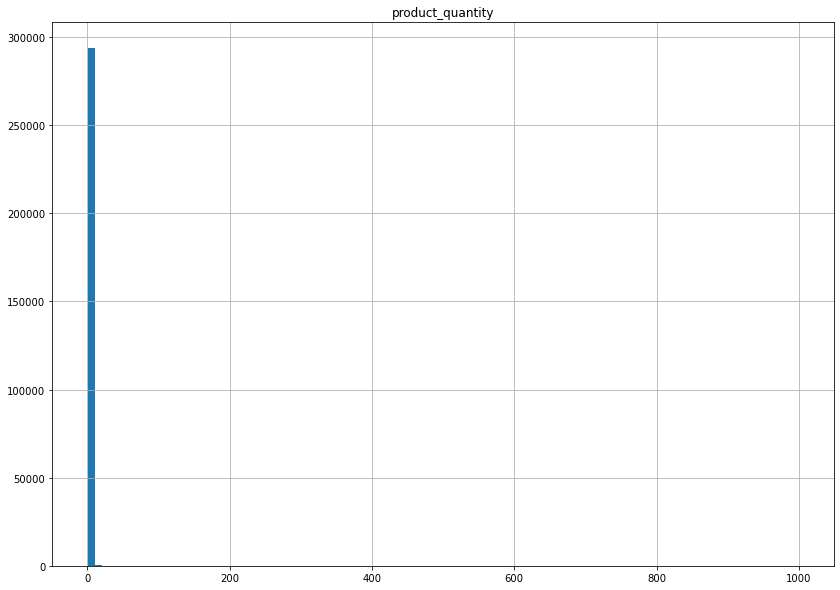

In [19]:
orderlines.hist('product_quantity', bins = 100, figsize= (14,10))

In [20]:
orderlines.describe()

,id,id_order,product_id,product_quantity
count,2.939830e+05,293983.000000,293983.0,293983.000000
mean,1.397918e+06,419999.116544,0.0,1.121126
std,1.530096e+05,66344.486479,0.0,3.396569
min,1.119109e+06,241319.000000,0.0,1.000000
25%,1.262542e+06,362258.500000,0.0,1.000000
50%,1.406940e+06,425956.000000,0.0,1.000000
75%,1.531322e+06,478657.000000,0.0,1.000000
max,1.650203e+06,527401.000000,0.0,999.000000


**INFO:**
- histogram of id looks normal - just id's in a certain range between >20000 and <40000
- id_order looks relatively normal, but with id's being very low. One could look for ID_orders that are too short and may be broken
- The product_id is 0 and can be deleted



**FLAG: product_quantity seems to have outliers / is squewd -**

- product_quantity = min, 25%, 50%, 75% are all = 1; max value = 999
- only 12 values are > 100 product_quantity







In [41]:
orderlines.nlargest(30, 'product_quantity')


,id,id_order,product_id,product_quantity,sku,unit_price,date
53860,1228150,346221,0,999,APP1190,55.99,2017-04-14 21:50:52
68712,1254032,358747,0,999,SEV0028,19.99,2017-05-24 14:51:58
57796,1234924,349475,0,800,KIN0137,7.49,2017-04-25 09:59:00
57306,1234111,349133,0,555,APP0665,70.99,2017-04-24 10:20:13
40813,1204788,335057,0,201,THU0029,80.99,2017-03-14 15:25:53
136675,1388261,417536,0,200,TRK0009,29.99,2017-10-25 15:02:39
204637,1500715,464858,0,192,APP1662,519.00,2017-12-17 15:53:04
246048,1574262,496172,0,164,EVU0013,19.99,2018-01-22 16:14:42
27779,1180010,323959,0,126,ADN0039,34.99,2017-02-14 10:21:12
285492,1637611,522075,0,125,XDO0047,25.99,2018-03-06 10:07:54


## Explore categorical columns with value_counts() and .plot.bar()

In [42]:
#No categorical columns to be checked
#order_states = orders.state.value_counts()
#order_states.plot.bar()

There are no categorical columns to explore - except maybe sku

In [43]:
# I would like to see a relationship between category "Shopping Basket" and the "created_date"
# but so far it does not work.
#orders.plot.scatter(x="state", y="created_date");
